# Dispersion Plots

In this notebook we build dispersion plots. We start by loading and processing the data, and show examples of dispersion plots and their uses. Then we build topic lists and create overlayed dispersion plots to visualize the where these different topics are being talked about across each interview and podcast. Finally, we make some observations on our findings. These plots allow us to visualize the where the various topic were covered in the interviews and compare the sparsity of topics being discussed. 

## Load and Process Data

In [1]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%run functions.ipynb

In [3]:
master_list = json.load(open('../data/master_list.json'))
len(master_list)

24

## Testing Dispersion Plots

Using dispersion plots we can see all the "hits" of a certain word throughout the interview transcript.

In [4]:
test = master_list[0]['tokens']

In [5]:
the_hits = find_all(test, 'the')

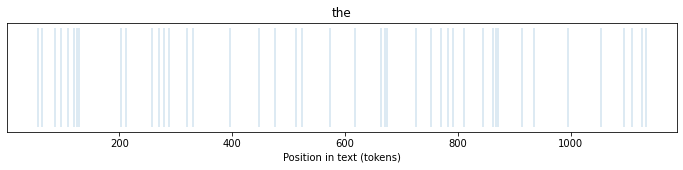

In [6]:
dispersion_plot(the_hits,'the')

This allows us to do things like loop through each interview and see where the different formats mention the word "economy"

Harris 60 Minutes
Total Tokens: 1136


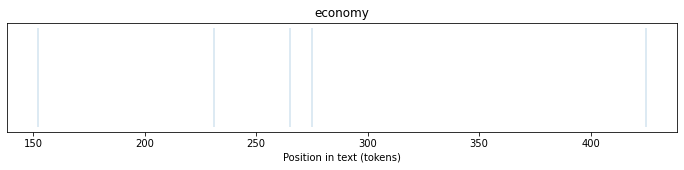

Harris CNN
Total Tokens: 2673


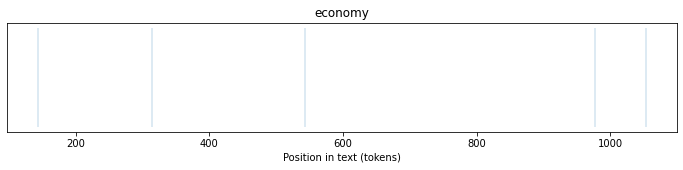

Harris Fox
Total Tokens: 2894


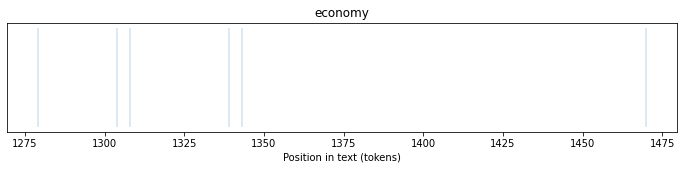

Harris NBC
Total Tokens: 2839


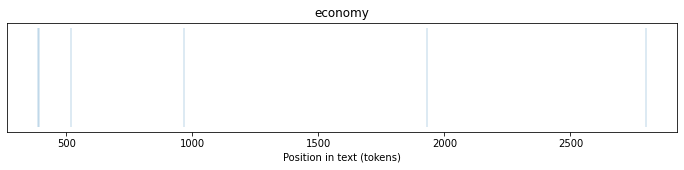

Harris All The Smoke
Total Tokens: 6262


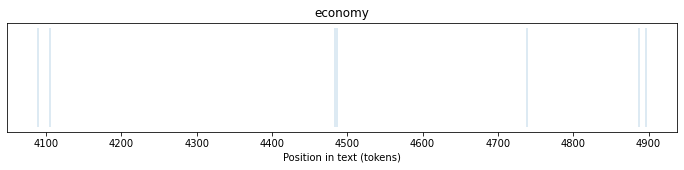

Harris Call Her Daddy
Total Tokens: 4548


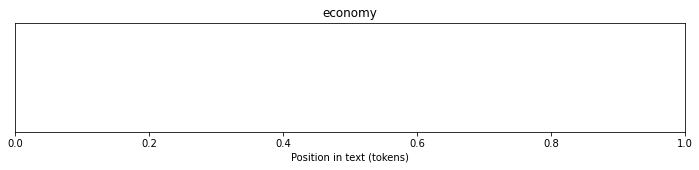

Harris Club Shay Shay
Total Tokens: 7688


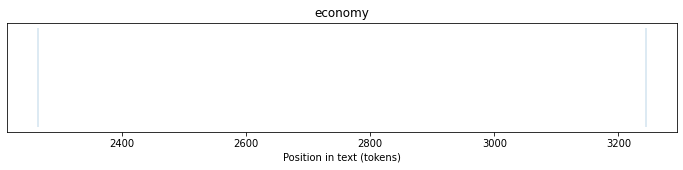

Harris Howard Stern
Total Tokens: 4682


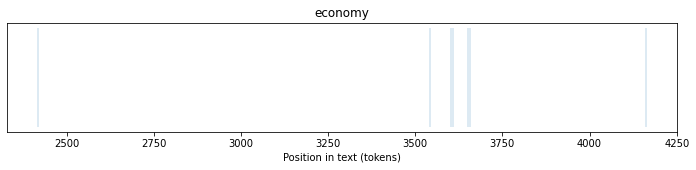

Harris The Breakfast Club
Total Tokens: 7544


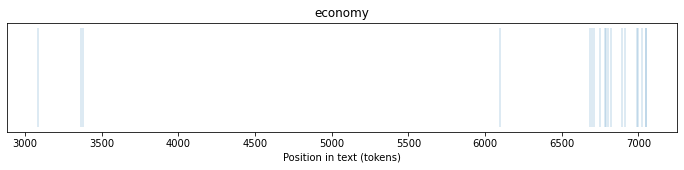

Trump Bloomberg
Total Tokens: 10123


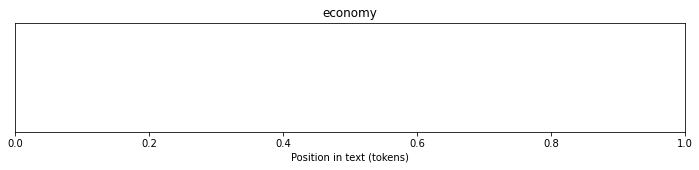

Trump Fox News Faulkner
Total Tokens: 1422


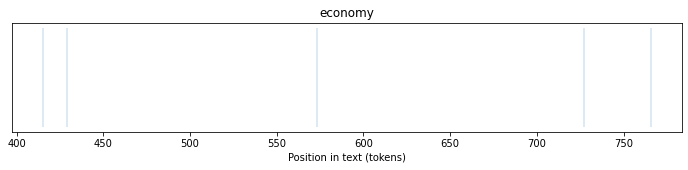

Trump Fox News Ingram
Total Tokens: 1522


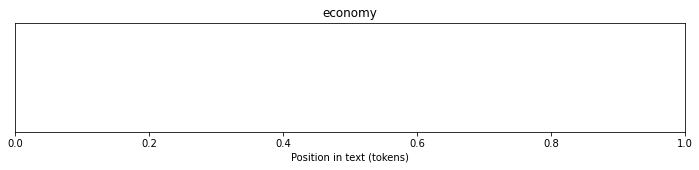

Trump NABJ
Total Tokens: 4744


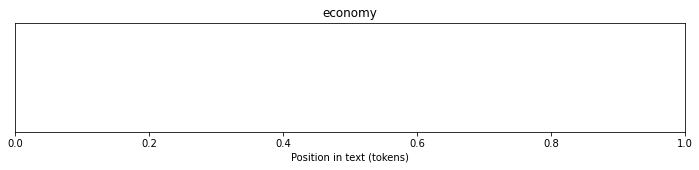

Trump Adin Ross
Total Tokens: 11982


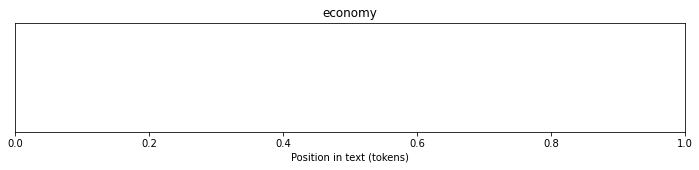

Trump Ben Shapiro
Total Tokens: 3598


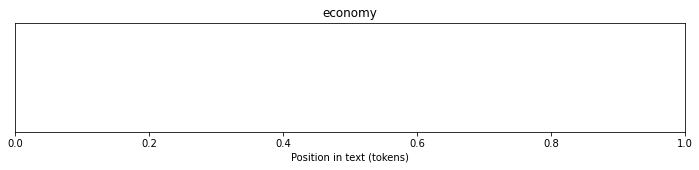

Trump Bussin With The Boys
Total Tokens: 6633


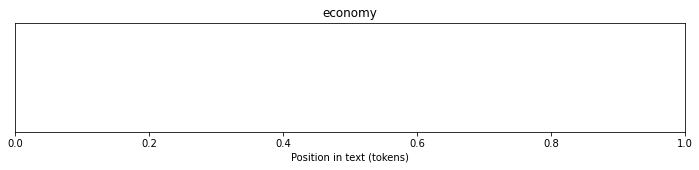

Trump Elon Musk
Total Tokens: 14912


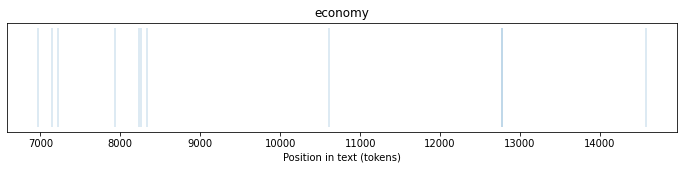

Trump Flagrant Podcast
Total Tokens: 13134


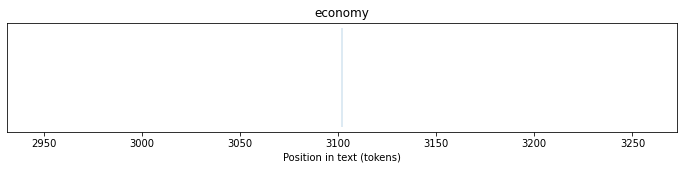

Trump Impaulsive
Total Tokens: 7405


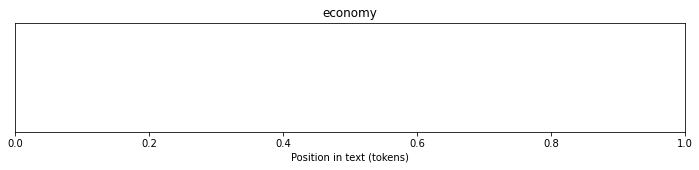

Trump Joe Rogan
Total Tokens: 26206


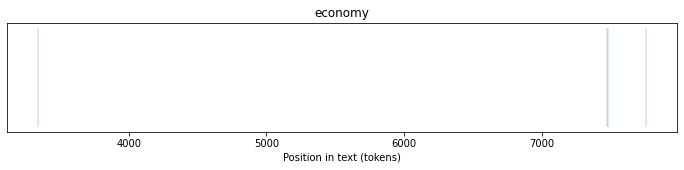

Trump Lex Friedman
Total Tokens: 5532


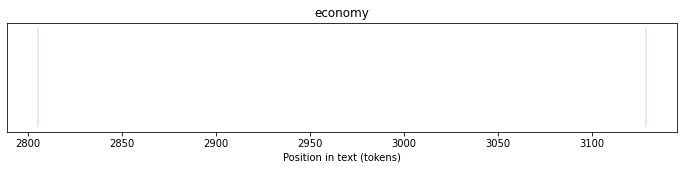

Trump Nelk Boys
Total Tokens: 4979


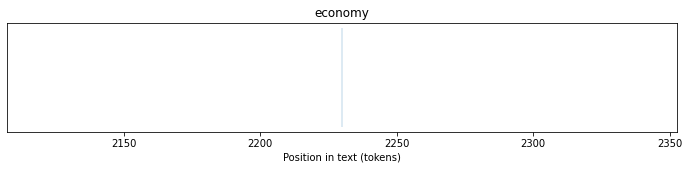

Trump PBD Podcast
Total Tokens: 10384


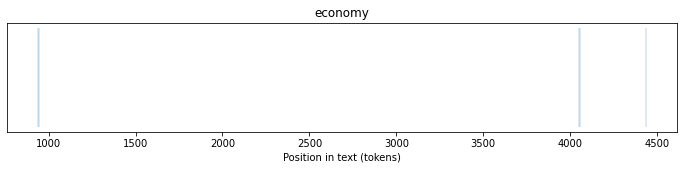

Trump Theo Von
Total Tokens: 6549


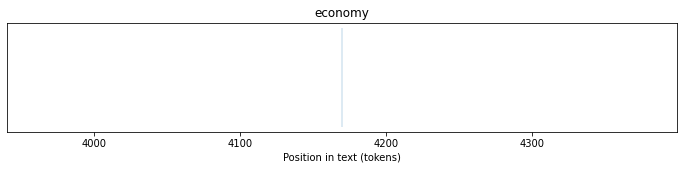

In [7]:
for item in master_list:
    economy_hits = find_all(item['tokens'], 'economy')
    print(item['title'].replace("_"," "))
    print('Total Tokens:', len(item['tokens']))
    dispersion_plot(economy_hits,'economy')

## Building Topic Lists

In order to build overlayed dispersion plots we'll analyze six different types of words: economy words (e.g. tax, tarriff, etc), election words (e.g. vote, ballot, etc.), foreign policy words (e.g. diplomacy, China, etc.), immigration words (e.g. border, visa, etc.), abortion words (e.g. fetus, roe, etc.), and healthcare words (e.g. patient, medicine, etc.). By building lists of each of these word types we can plot the hits of each type in dispersion plots to see which topics are being talked about throughout the podcasts and interviews. 

In [8]:
economy_words = [
    'economy', 'economies', 'economic', 'finance', 'finances', 'financial', 
    'market', 'markets', 'trade', 'trades', 'trading', 'growth', 'inflation', 
    'recession', 'investment', 'investments', 'invest', 'investing', 'revenue', 
    'revenues', 'profit', 'profits', 'profitability', 'cost', 
    'costs', 'spending', 'expenditure', 'expenditures', 'debt', 'debts', 'deficit', 
    'deficits', 'surplus', 'surpluses', 'credit', 'credits', 'bank', 'banks', 
    'banking', 'loan', 'loans', 'interest', 'interests', 'capital', 'capitalism', 
    'wealth', 'monetary', 'money', 'currency', 'currencies', 'price', 'prices', 
    'pricing', 'valuation', 'valuations', 'budget', 'budgets', 'tax', 'taxes', 
    'taxation', 'tariff', 'tariffs', 'subsidy', 'subsidies', 'bonds', 'bond', 
    'stock', 'stocks', 'equity', 'equities', 'globalization', 'privatization', 
    'liberalization', 'subsidization', 'output', 'productivity', 'labor', 'employment', 
    'income', 'incomes', 'savings', 'saving'
]

In [9]:
election_words = [
    'election', 'elections', 'elect', 'electing', 'electoral', 'electorate', 'vote', 
    'votes', 'voting', 'voter', 'voters', 'ballot', 'ballots', 'poll', 'polls', 
    'polling', 'candidate', 'candidates', 'campaign', 'campaigns', 'campaigning', 
    'primary', 'primaries', 'referendum', 'referendums', 
    'debate', 'debates', 'constituency', 'constituencies', 
    'representative', 'representatives', 'democracy', 'democratic',
    'recount', 'recounts'
]

In [10]:
foreign_policy_words = [
    'foreign', 'policy', 'policies', 'diplomacy', 'diplomatic', 'ambassador', 'ambassadors',
    'treaty', 'treaties',
    'sanction', 'sanctions', 'alliance', 'alliances', 'coalition', 'coalitions',
    'international', 'relations', 'conflict', 'conflicts', 'peace', 'war', 'wars', 
    'military', 'security', 'national security', 'defense', 'defence',
    'intervention', 'interventions', 'aid', 'embargo', 'embargoes', 'sovereignty', 'sovereign',
    'diplomat', 'diplomats', 'embassy', 'embassies', 'summit', 'summits', 'united nations', 'UN', 'geopolitical', 
    'multilateral', 'bilateral', 'unilateral', 'United States', 'America', 'China', 'Russia', 'Germany', 'France', 'India', 
    'United Kingdom', 'UK', 'Brazil', 'Canada', 'Japan', 'South Korea', 'North Korea', 
    'Iran', 'Iraq', 'Israel', 'Palestine', 'Syria', 'Ukraine', 'Afghanistan', 'Pakistan', 
    'Saudi Arabia', 'Turkey', 'Mexico', 'Australia', 'Egypt', 'South Africa', 
    'Venezuela', 'Cuba', 'Nigeria', 'Argentina', 'Italy', 'Spain', 'Poland'
]

In [11]:
immigration_words = [
    # General immigration terms
    'immigration', 'immigrant', 'immigrants', 'emigration', 'emigrant', 'emigrants',
    'migrant', 'migrants', 'migration', 'migratory',
    'refugee', 'refugees', 'asylum', 'naturalization',
    'deportation', 'deport', 'deported', 'visa', 'visas', 
    'citizenship', 'citizen', 'citizens', 'residency', 'resident', 'residents',
    'undocumented', 'illegal', 'border', 'borders', 'entry', 'entries',
    'expatriate', 'expatriates', 'expat', 'expats',
    'detention', 'detained', 'amnesty', 'passport', 'passports', 'repatriation',
    'relocation', 'resettlement', 'resettle', 'displacement', 'displaced',
    'diaspora', 'integration', 'assimilation',
    'labor', 'worker', 'workers',
    'customs', 'officer', 'detention', 'camp', 'sanctuary', 'lottery', 'waiver'
]


In [12]:
abortion_words = [
    'abortion', 'choice', 'prochoice', 'prolife', 'termination', 'miscarriage', 
    'fetus', 'unborn', 'life', 'clinic', 'pill', 'reproductive',
    'mifepristone', 'roe', 'wade', 'ban', 'laws', 'procedures', 
    'contraception', 'parenthood', 'consent', 'abstinence'
]

In [13]:
healthcare_words = [
    'healthcare', 'medicine', 'treatment', 'doctor', 'nurse', 'hospital', 
    'clinic', 'patient', 'insurance', 'surgery', 'diagnosis', 'therapy', 
    'medication', 'recovery', 'vaccination', 'prevention', 'health', 'wellness', 
    'provider', 'care', 'doctorate', 'healthcare system', 'emergency', 
    'specialist', 'prescription', 'ambulance', 'physical', 'mental', 'hospitalization', 
    'chronic', 'acute', 'diagnostic', 'medical', 'doctor', 'nurse', 'physician', 
    'nursing', 'hospitalization', 'outpatient', 'inpatient', 'examination', 
    'health insurance', 'medicare', 'medicaid', 'facility', 'treatment', 'sick', 
    'well-being', 'condition', 'caregiver', 'palliative', 'rehabilitation'
]

## Building Overlayed Dispersion Plots

Using the dispersion_plot function we can plot all the hits for the economy_words for each podcast

Harris 60 Minutes
Total Tokens: 1136
Total hits for economy words: 14


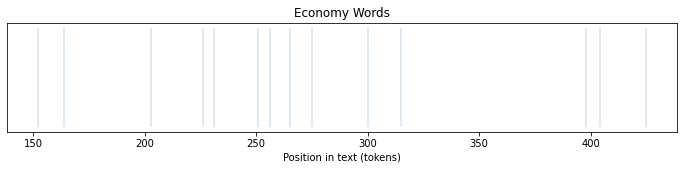

Harris CNN
Total Tokens: 2673
Total hits for economy words: 37


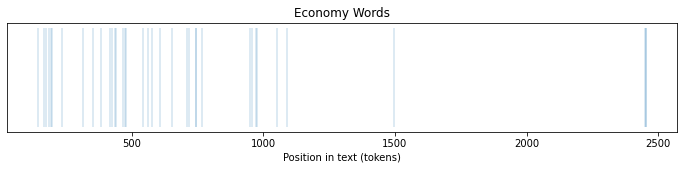

Harris Fox
Total Tokens: 2894
Total hits for economy words: 17


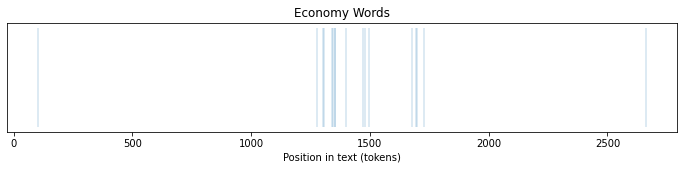

Harris NBC
Total Tokens: 2839
Total hits for economy words: 28


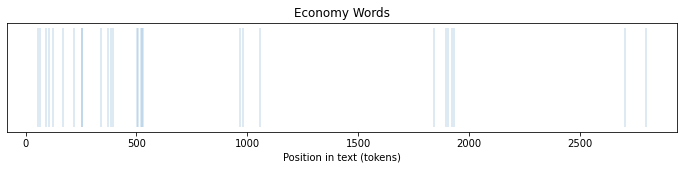

Harris All The Smoke
Total Tokens: 6262
Total hits for economy words: 35


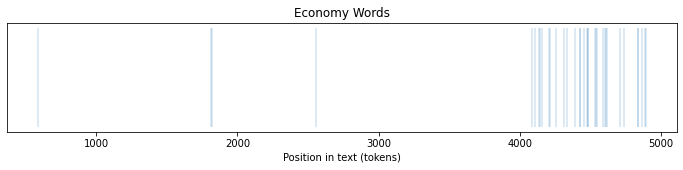

Harris Call Her Daddy
Total Tokens: 4548
Total hits for economy words: 26


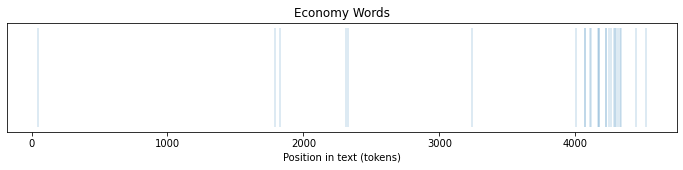

Harris Club Shay Shay
Total Tokens: 7688
Total hits for economy words: 54


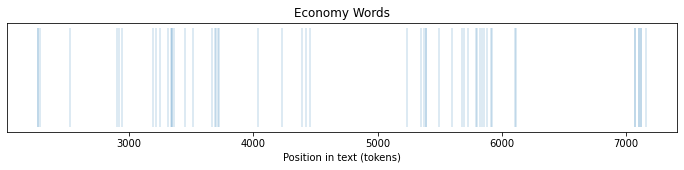

Harris Howard Stern
Total Tokens: 4682
Total hits for economy words: 22


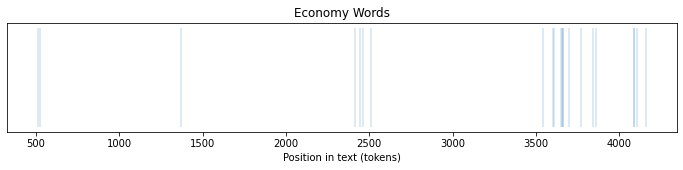

Harris The Breakfast Club
Total Tokens: 7544
Total hits for economy words: 98


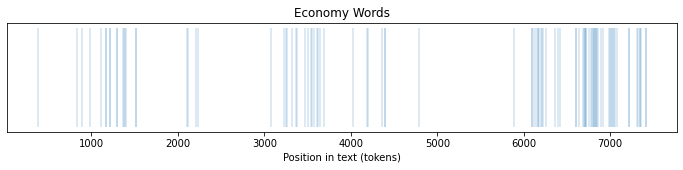

Trump Bloomberg
Total Tokens: 10123
Total hits for economy words: 99


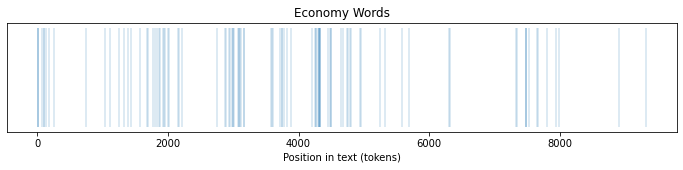

Trump Fox News Faulkner
Total Tokens: 1422
Total hits for economy words: 33


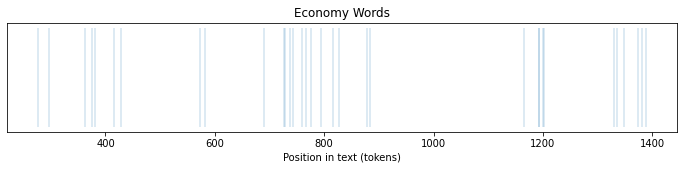

Trump Fox News Ingram
Total Tokens: 1522
Total hits for economy words: 1


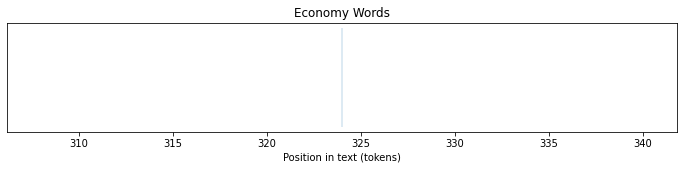

Trump NABJ
Total Tokens: 4744
Total hits for economy words: 30


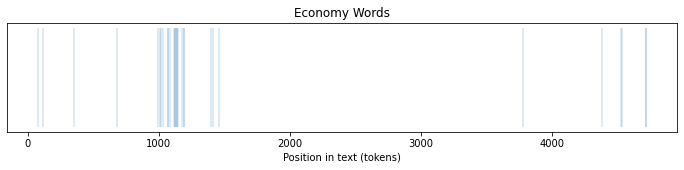

Trump Adin Ross
Total Tokens: 11982
Total hits for economy words: 20


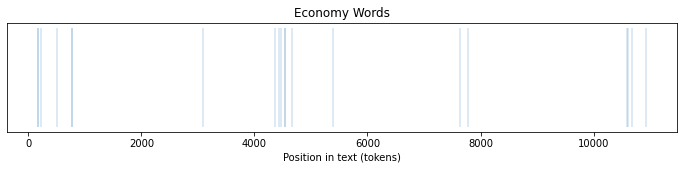

Trump Ben Shapiro
Total Tokens: 3598
Total hits for economy words: 13


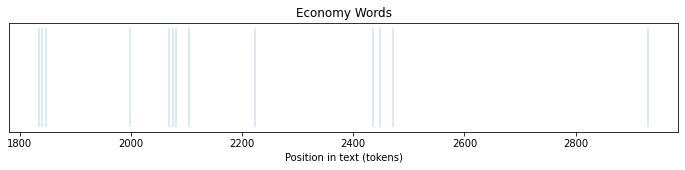

Trump Bussin With The Boys
Total Tokens: 6633
Total hits for economy words: 8


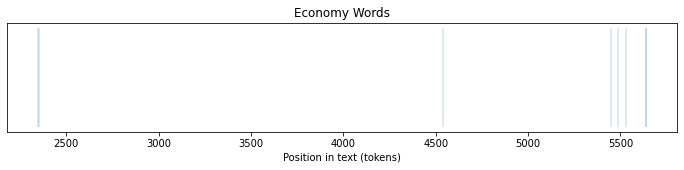

Trump Elon Musk
Total Tokens: 14912
Total hits for economy words: 80


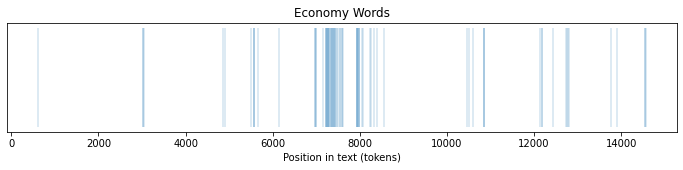

Trump Flagrant Podcast
Total Tokens: 13134
Total hits for economy words: 29


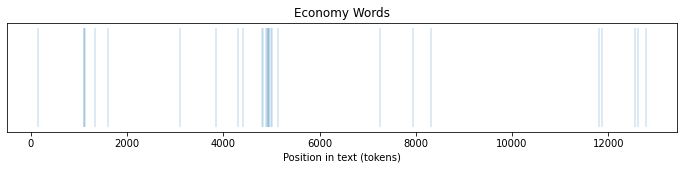

Trump Impaulsive
Total Tokens: 7405
Total hits for economy words: 23


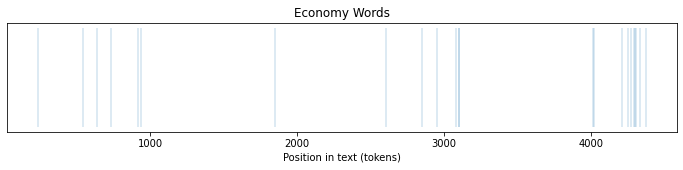

Trump Joe Rogan
Total Tokens: 26206
Total hits for economy words: 106


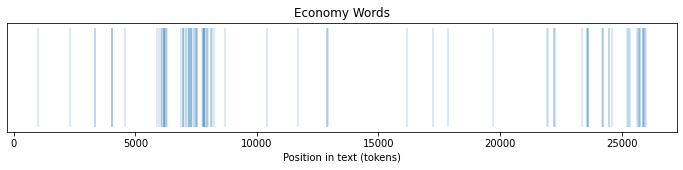

Trump Lex Friedman
Total Tokens: 5532
Total hits for economy words: 8


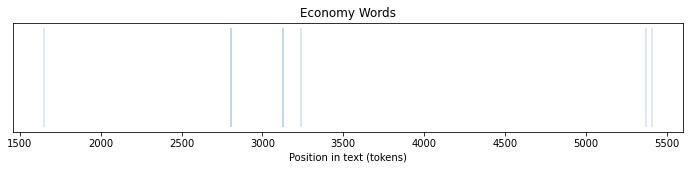

Trump Nelk Boys
Total Tokens: 4979
Total hits for economy words: 21


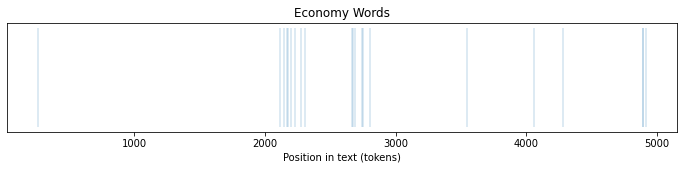

Trump PBD Podcast
Total Tokens: 10384
Total hits for economy words: 40


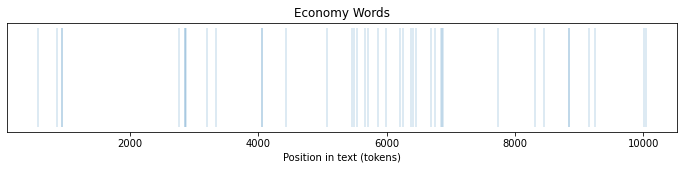

Trump Theo Von
Total Tokens: 6549
Total hits for economy words: 36


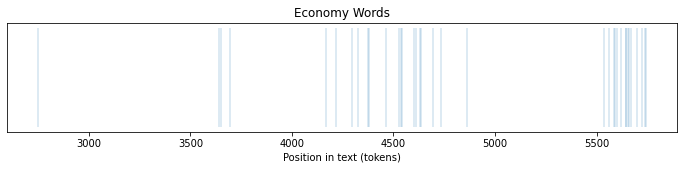

In [14]:
for item in master_list:
    print(item['title'].replace("_", " "))
    print('Total Tokens:', len(item['tokens']))
    
    all_hits = []  # List to store all hits for economy words
    
    # For each economy-related word
    for word in economy_words:
        word_hits = find_all(item['tokens'], word)  # Find occurrences of the word
        if word_hits:  # Only process if there are hits
            all_hits.extend(word_hits)  # Append hits to the combined list
    
    if all_hits:  # Only plot if there are any hits
        print(f"Total hits for economy words: {len(all_hits)}")
        dispersion_plot(all_hits, "Economy Words")

We can do the same for the immigration_words for each podcast

Harris 60 Minutes
Total Tokens: 1136
Total hits for immigration words: 4


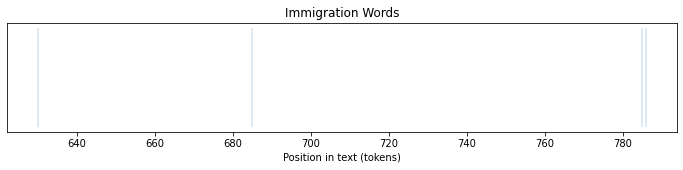

Harris CNN
Total Tokens: 2673
Total hits for immigration words: 12


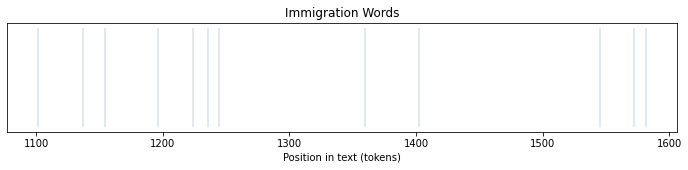

Harris Fox
Total Tokens: 2894
Total hits for immigration words: 26


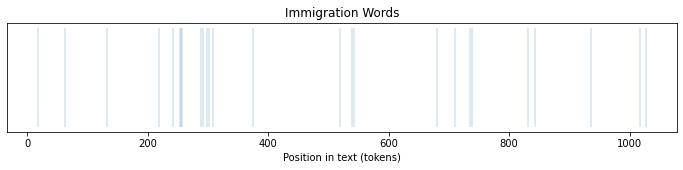

Harris NBC
Total Tokens: 2839
Total hits for immigration words: 7


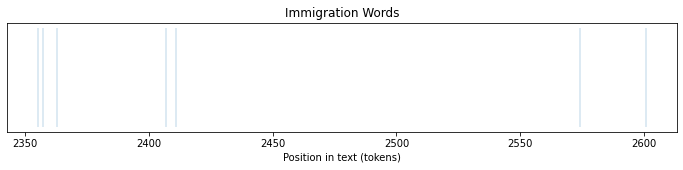

Harris All The Smoke
Total Tokens: 6262
Total hits for immigration words: 1


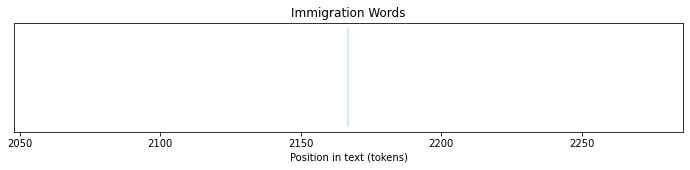

Harris Call Her Daddy
Total Tokens: 4548
Total hits for immigration words: 1


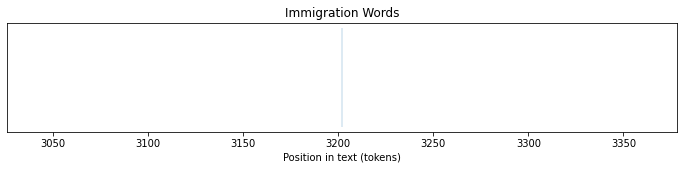

Harris Club Shay Shay
Total Tokens: 7688
Total hits for immigration words: 17


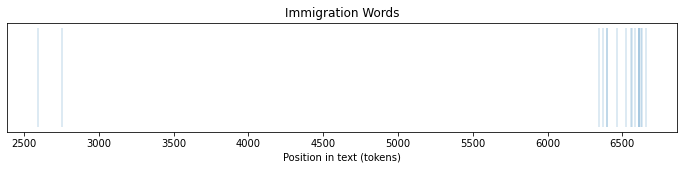

Harris Howard Stern
Total Tokens: 4682
Total hits for immigration words: 8


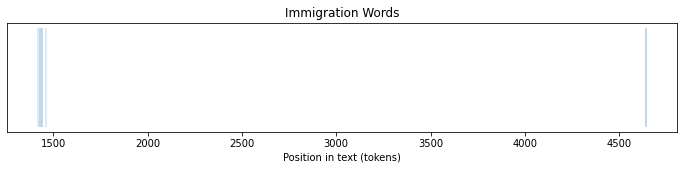

Harris The Breakfast Club
Total Tokens: 7544
Total hits for immigration words: 16


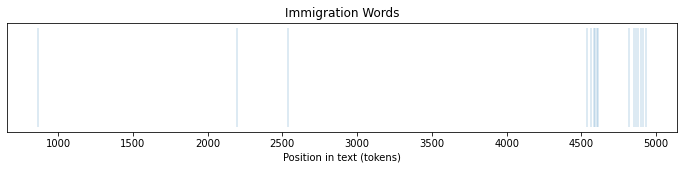

Trump Bloomberg
Total Tokens: 10123
Total hits for immigration words: 10


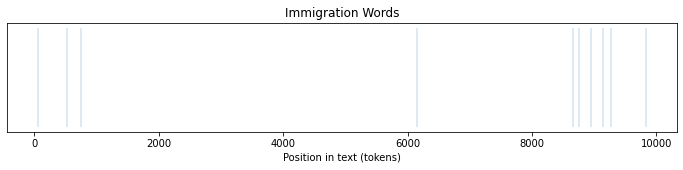

Trump Fox News Faulkner
Total Tokens: 1422
Total hits for immigration words: 13


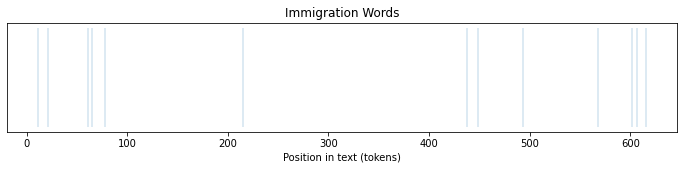

Trump Fox News Ingram
Total Tokens: 1522
Total hits for immigration words: 4


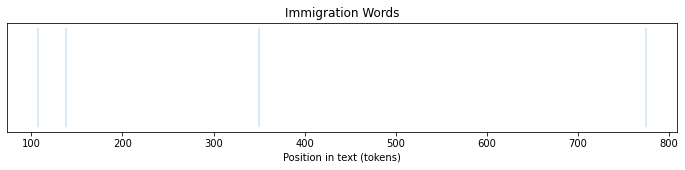

Trump NABJ
Total Tokens: 4744
Total hits for immigration words: 16


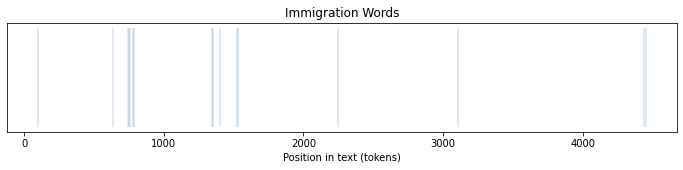

Trump Adin Ross
Total Tokens: 11982
Total hits for immigration words: 6


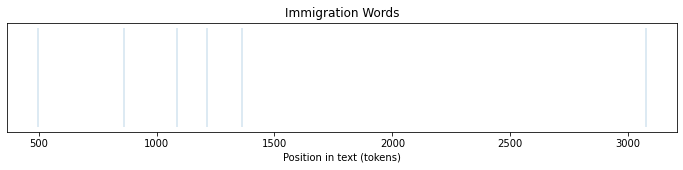

Trump Ben Shapiro
Total Tokens: 3598
Total hits for immigration words: 1


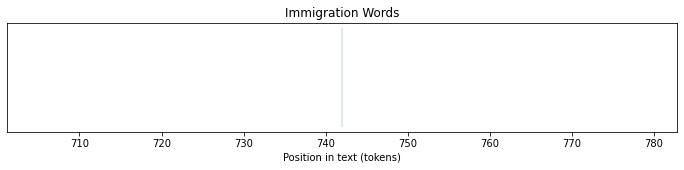

Trump Bussin With The Boys
Total Tokens: 6633
Total hits for immigration words: 3


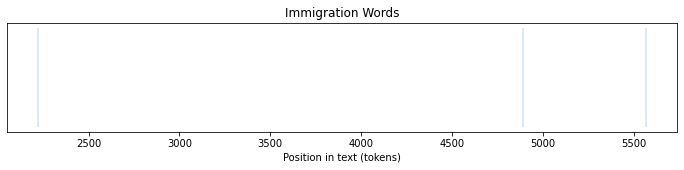

Trump Elon Musk
Total Tokens: 14912
Total hits for immigration words: 42


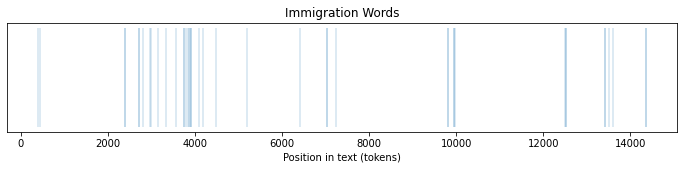

Trump Flagrant Podcast
Total Tokens: 13134
Total hits for immigration words: 7


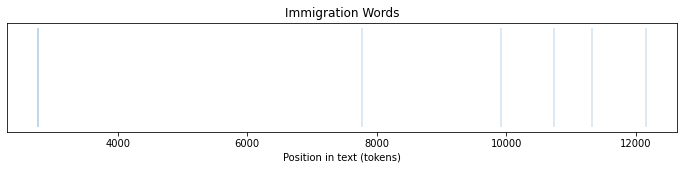

Trump Impaulsive
Total Tokens: 7405
Total hits for immigration words: 13


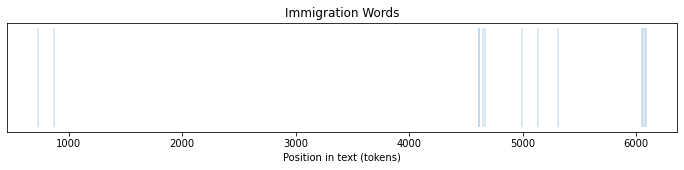

Trump Joe Rogan
Total Tokens: 26206
Total hits for immigration words: 20


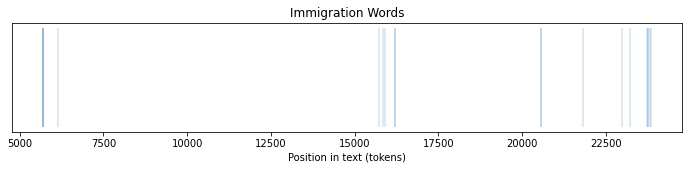

Trump Lex Friedman
Total Tokens: 5532
Total hits for immigration words: 13


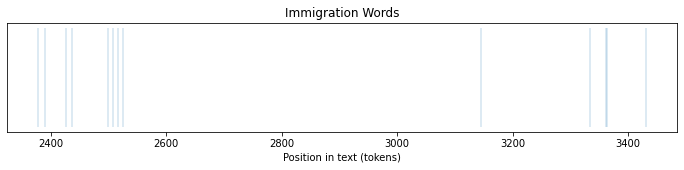

Trump Nelk Boys
Total Tokens: 4979
Total hits for immigration words: 8


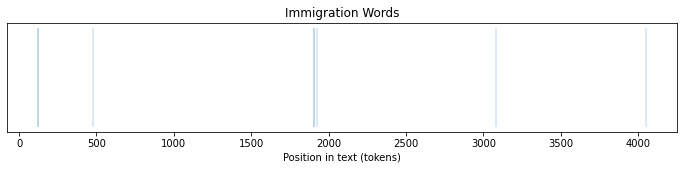

Trump PBD Podcast
Total Tokens: 10384
Total hits for immigration words: 15


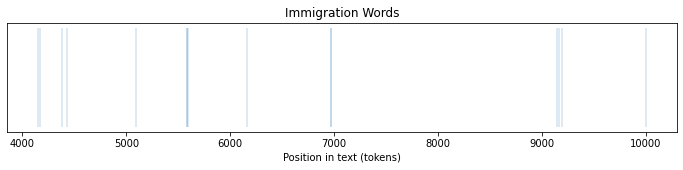

Trump Theo Von
Total Tokens: 6549
Total hits for immigration words: 15


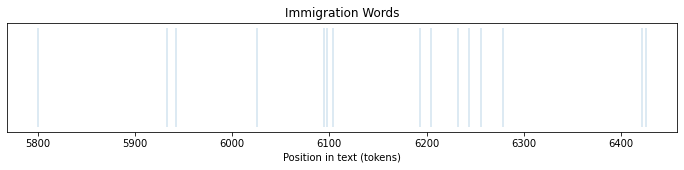

In [15]:
for item in master_list:
    print(item['title'].replace("_", " "))
    print('Total Tokens:', len(item['tokens']))
    
    all_hits = []  # List to store all hits for economy words
    
    # For each economy-related word
    for word in immigration_words:
        word_hits = find_all(item['tokens'], word)  # Find occurrences of the word
        if word_hits:  # Only process if there are hits
            all_hits.extend(word_hits)  # Append hits to the combined list
    
    if all_hits:  # Only plot if there are any hits
        print(f"Total hits for immigration words: {len(all_hits)}")
        dispersion_plot(all_hits, "Immigration Words")

To put it all the variables together into overlayed dispersion plots, we'll store all the hits for each type of word for each podcast in a list of dictionaries.

In [16]:
hits_dicts = []  # List to store hits_dicts for each title in master_list

for item in master_list:
    title = item['title'].replace("_", " ")  # Get the title, formatted nicely
    tokens = item['tokens']  # Token list for the current item
    
    # Initialize an empty dictionary to hold the hits for different categories
    hits_dict = {}
    
    # For Economy words
    economy_hits = []
    for word in economy_words:
        word_hits = find_all(tokens, word)  # Find occurrences of the word
        if word_hits:  # Only process if there are hits
            economy_hits.extend(word_hits)  # Append hits to the combined list
    if economy_hits:  # Add to hits_dict if there are any hits
        hits_dict['Economy'] = economy_hits
    
    # For Immigration words
    immigration_hits = []
    for word in immigration_words:
        word_hits = find_all(tokens, word)  # Find occurrences of the word
        if word_hits:
            immigration_hits.extend(word_hits)
    if immigration_hits:
        hits_dict['Immigration'] = immigration_hits

    # For Foreign Policy words
    foreign_policy_hits = []
    for word in foreign_policy_words:
        word_hits = find_all(tokens, word)  # Find occurrences of the word
        if word_hits:
            foreign_policy_hits.extend(word_hits)
    if foreign_policy_hits:
        hits_dict['Foreign Policy'] = foreign_policy_hits
    
    # For Election words
    election_hits = []  # Initialize the list to store hits for election-related words
    for word in election_words:
        word_hits = find_all(tokens, word)  # Find occurrences of the word in the document's tokens
        if word_hits:
            election_hits.extend(word_hits)  # Add the hits to the election_hits list

    # If there are any hits for election-related words, add them to the hits_dict
    if election_hits:
        hits_dict['Election'] = election_hits
    
    # For Abortion words
    abortion_hits = []  # Initialize the list to store hits for abortion-related words
    for word in abortion_words:
        word_hits = find_all(tokens, word)  # Find occurrences of the word in the document's tokens
        if word_hits:
            abortion_hits.extend(word_hits)  # Add the hits to the abortion_hits list
    
    # If there are any hits for abortion-related words, add them to the hits_dict
    if abortion_hits:
        hits_dict['Abortion'] = abortion_hits
    
    # For Healthcare words
    healthcare_hits = []  # Initialize the list to store hits for healthcare-related words
    for word in healthcare_words:
        word_hits = find_all(tokens, word)  # Find occurrences of the word in the document's tokens
        if word_hits:
            healthcare_hits.extend(word_hits)  # Add the hits to the healthcare_hits list
    
    # If there are any hits for healthcare-related words, add them to the hits_dict
    if healthcare_hits:
        hits_dict['Healthcare'] = healthcare_hits
    
    # Add the hits_dict for the current item to the hits_dicts list
    if hits_dict:  # Only add to hits_dicts if there are any hits
        hits_dicts.append({
            'title': title,
            'hits_dict': hits_dict,
            'length': len(tokens)
        })

This is what a dictionary in the list looks like:

In [17]:
hits_dicts[0]

{'title': 'Harris 60 Minutes',
 'hits_dict': {'Economy': [152,
   231,
   265,
   275,
   425,
   226,
   251,
   256,
   404,
   203,
   164,
   315,
   398,
   300],
  'Immigration': [630, 786, 785, 685],
  'Foreign Policy': [753, 900, 118, 51, 100, 909, 686],
  'Election': [454, 471, 467, 494]},
 'length': 1136}

Here's an example of what an overlayed dispersion plot looks like for Kamala Harris' 60 Minute Interview

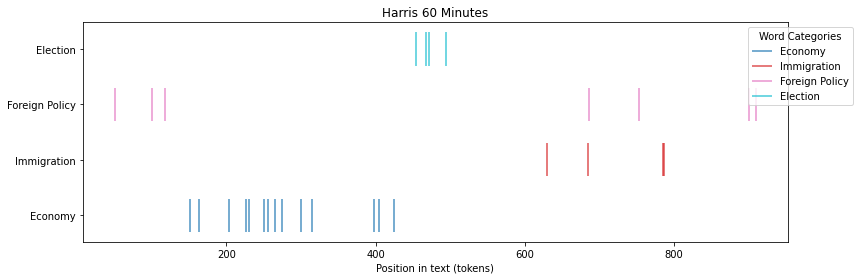

Economy Words Count: 14
Immigration Words Count: 4
Foreign Policy Words Count: 7
Election Words Count: 4
Total Length: 1136 



In [18]:
dispersion_plot_overlays(hits_dicts[0]['hits_dict'], title=hits_dicts[0]['title'])
print('Total Length:', hits_dicts[0]['length'], '\n')

And finally, we can loop through all the hits_dicts and plot overlayed dispersion plots for each interview

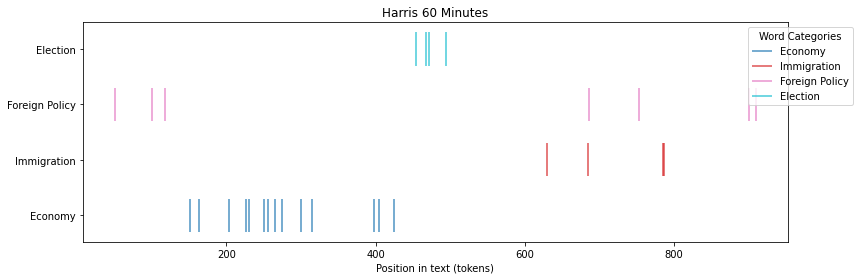

Economy Words Count: 14
Immigration Words Count: 4
Foreign Policy Words Count: 7
Election Words Count: 4
Total Length: 1136 



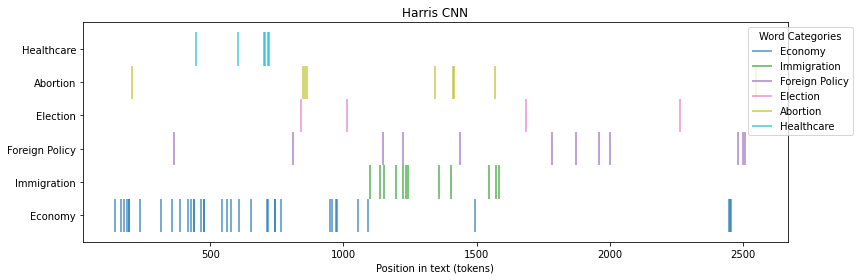

Economy Words Count: 37
Immigration Words Count: 12
Foreign Policy Words Count: 12
Election Words Count: 4
Abortion Words Count: 9
Healthcare Words Count: 6
Total Length: 2673 



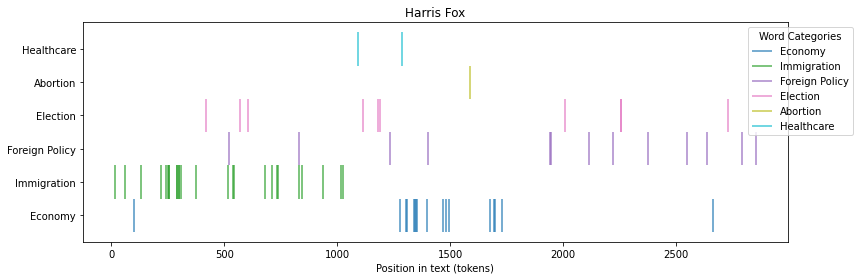

Economy Words Count: 17
Immigration Words Count: 26
Foreign Policy Words Count: 13
Election Words Count: 10
Abortion Words Count: 1
Healthcare Words Count: 2
Total Length: 2894 



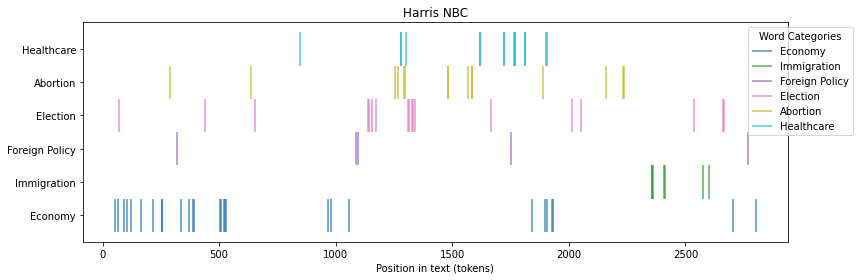

Economy Words Count: 28
Immigration Words Count: 7
Foreign Policy Words Count: 5
Election Words Count: 18
Abortion Words Count: 15
Healthcare Words Count: 15
Total Length: 2839 



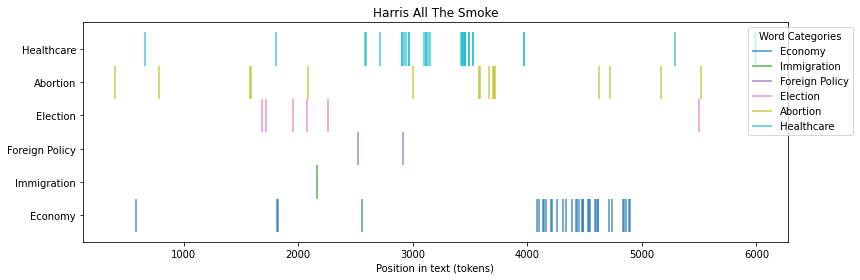

Economy Words Count: 35
Immigration Words Count: 1
Foreign Policy Words Count: 2
Election Words Count: 6
Abortion Words Count: 16
Healthcare Words Count: 32
Total Length: 6262 



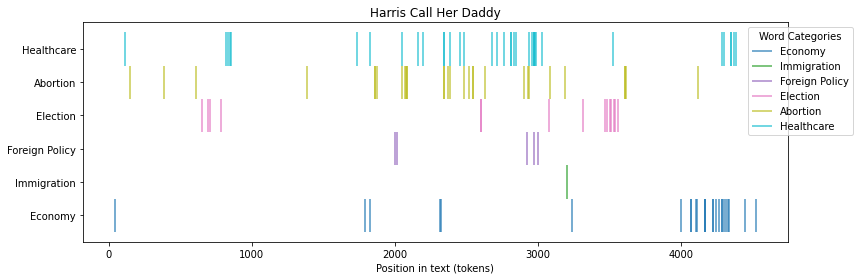

Economy Words Count: 26
Immigration Words Count: 1
Foreign Policy Words Count: 5
Election Words Count: 15
Abortion Words Count: 30
Healthcare Words Count: 37
Total Length: 4548 



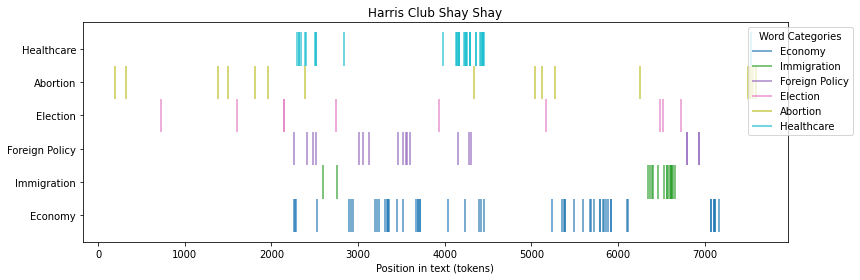

Economy Words Count: 54
Immigration Words Count: 17
Foreign Policy Words Count: 19
Election Words Count: 10
Abortion Words Count: 19
Healthcare Words Count: 35
Total Length: 7688 



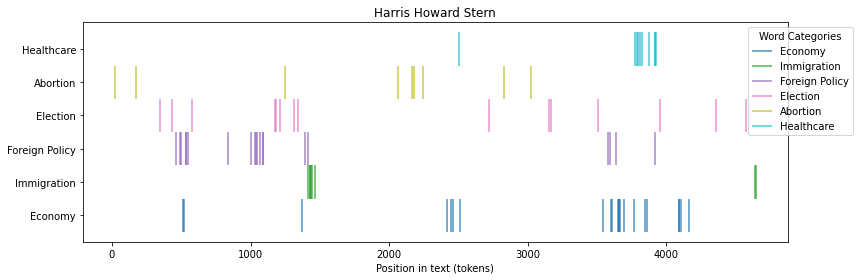

Economy Words Count: 22
Immigration Words Count: 8
Foreign Policy Words Count: 20
Election Words Count: 15
Abortion Words Count: 9
Healthcare Words Count: 10
Total Length: 4682 



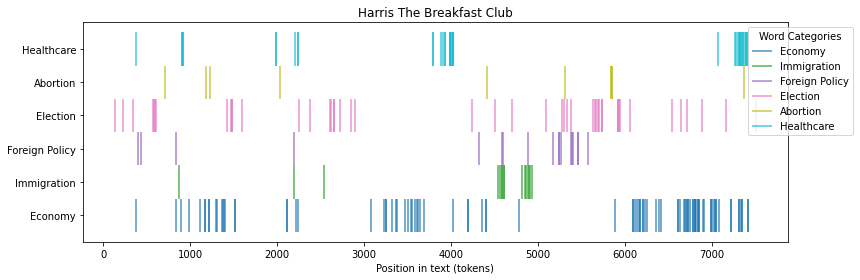

Economy Words Count: 98
Immigration Words Count: 16
Foreign Policy Words Count: 18
Election Words Count: 47
Abortion Words Count: 11
Healthcare Words Count: 41
Total Length: 7544 



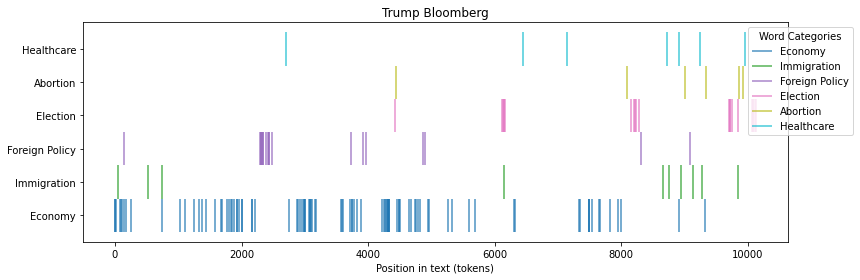

Economy Words Count: 99
Immigration Words Count: 10
Foreign Policy Words Count: 19
Election Words Count: 21
Abortion Words Count: 6
Healthcare Words Count: 7
Total Length: 10123 



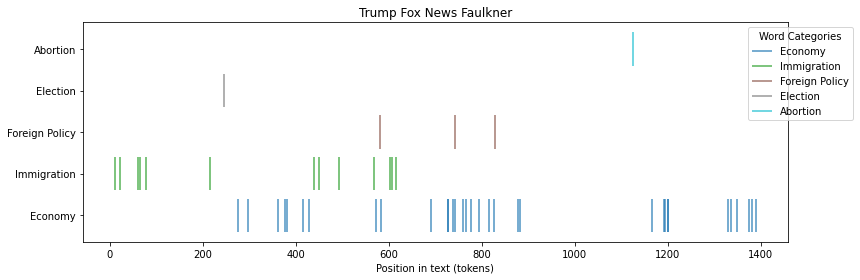

Economy Words Count: 33
Immigration Words Count: 13
Foreign Policy Words Count: 3
Election Words Count: 1
Abortion Words Count: 1
Total Length: 1422 



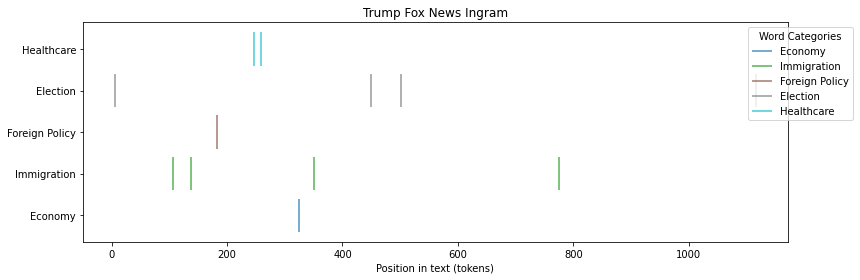

Economy Words Count: 1
Immigration Words Count: 4
Foreign Policy Words Count: 1
Election Words Count: 4
Healthcare Words Count: 2
Total Length: 1522 



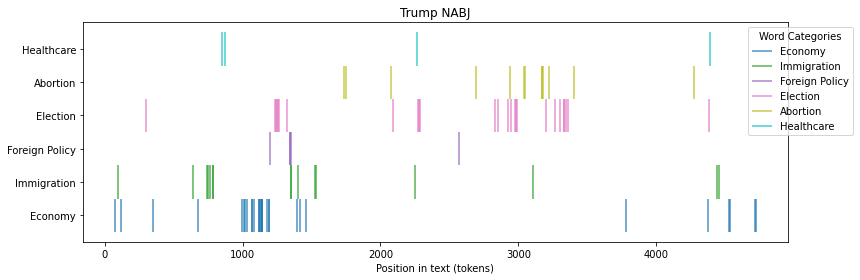

Economy Words Count: 30
Immigration Words Count: 16
Foreign Policy Words Count: 5
Election Words Count: 26
Abortion Words Count: 13
Healthcare Words Count: 4
Total Length: 4744 



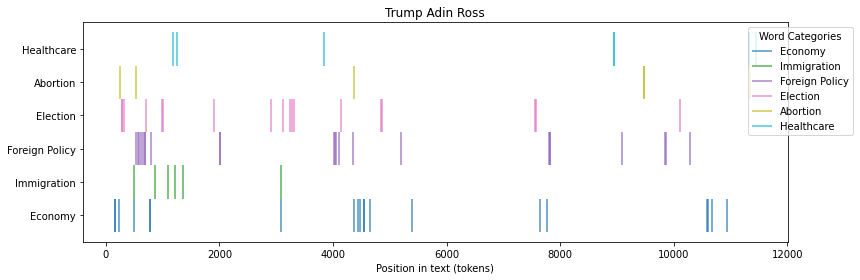

Economy Words Count: 20
Immigration Words Count: 6
Foreign Policy Words Count: 23
Election Words Count: 18
Abortion Words Count: 6
Healthcare Words Count: 8
Total Length: 11982 



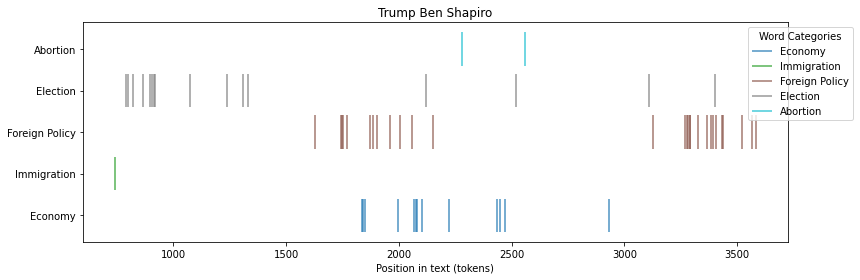

Economy Words Count: 13
Immigration Words Count: 1
Foreign Policy Words Count: 28
Election Words Count: 16
Abortion Words Count: 2
Total Length: 3598 



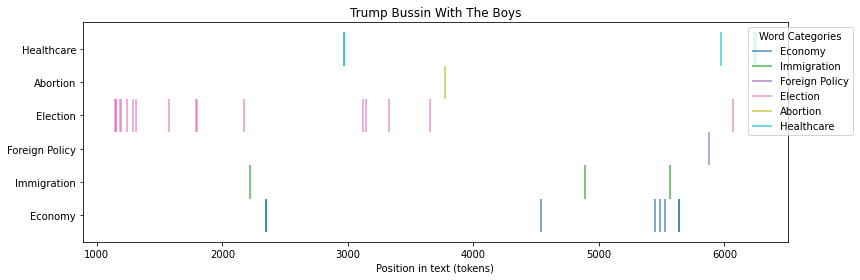

Economy Words Count: 8
Immigration Words Count: 3
Foreign Policy Words Count: 1
Election Words Count: 17
Abortion Words Count: 1
Healthcare Words Count: 5
Total Length: 6633 



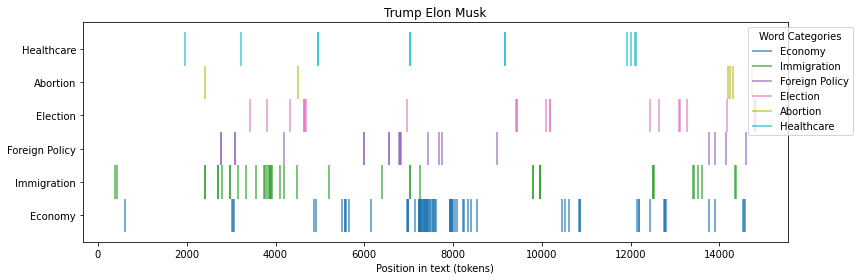

Economy Words Count: 80
Immigration Words Count: 42
Foreign Policy Words Count: 21
Election Words Count: 23
Abortion Words Count: 6
Healthcare Words Count: 12
Total Length: 14912 



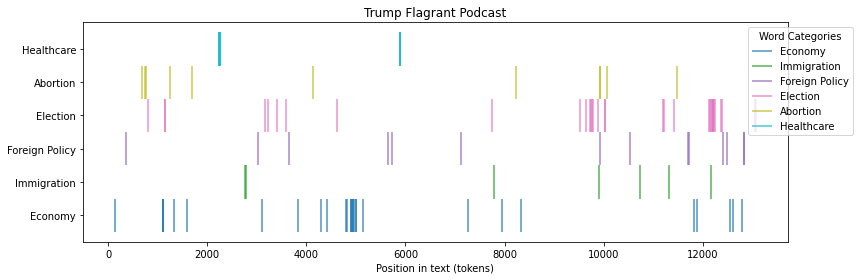

Economy Words Count: 29
Immigration Words Count: 7
Foreign Policy Words Count: 14
Election Words Count: 36
Abortion Words Count: 11
Healthcare Words Count: 10
Total Length: 13134 



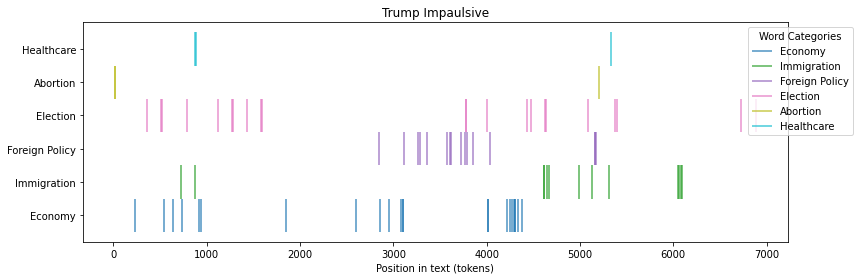

Economy Words Count: 23
Immigration Words Count: 13
Foreign Policy Words Count: 16
Election Words Count: 22
Abortion Words Count: 3
Healthcare Words Count: 3
Total Length: 7405 



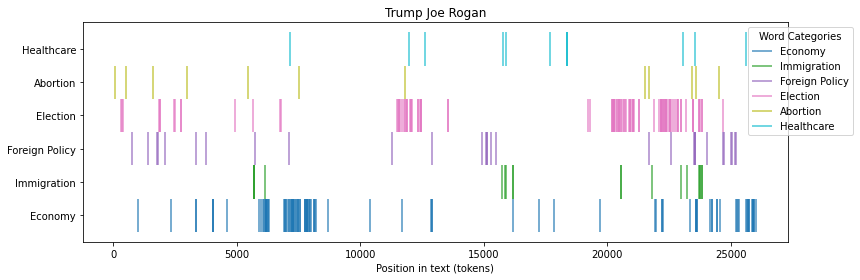

Economy Words Count: 106
Immigration Words Count: 20
Foreign Policy Words Count: 30
Election Words Count: 105
Abortion Words Count: 12
Healthcare Words Count: 12
Total Length: 26206 



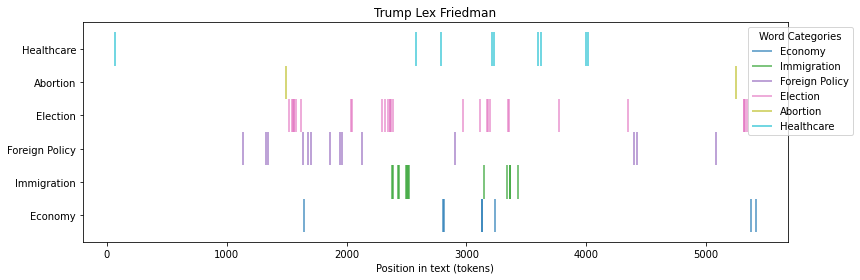

Economy Words Count: 8
Immigration Words Count: 13
Foreign Policy Words Count: 14
Election Words Count: 29
Abortion Words Count: 2
Healthcare Words Count: 9
Total Length: 5532 



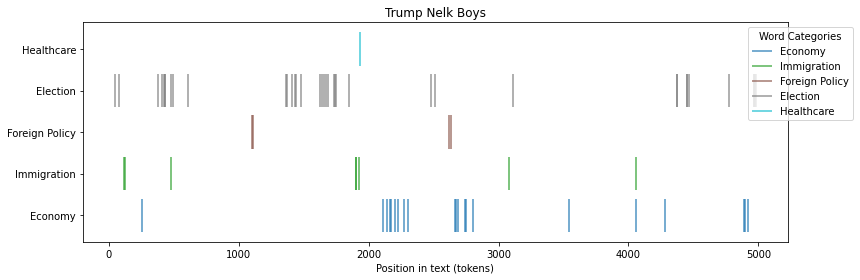

Economy Words Count: 21
Immigration Words Count: 8
Foreign Policy Words Count: 4
Election Words Count: 38
Healthcare Words Count: 1
Total Length: 4979 



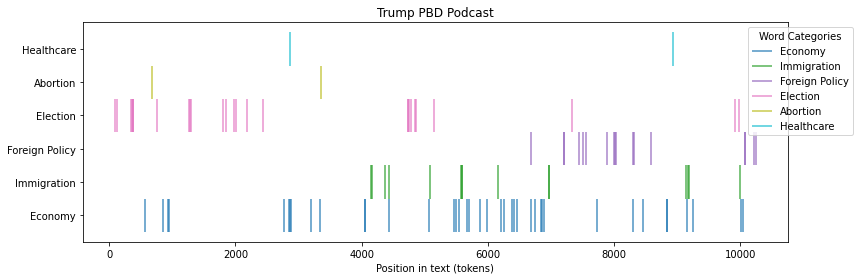

Economy Words Count: 40
Immigration Words Count: 15
Foreign Policy Words Count: 17
Election Words Count: 27
Abortion Words Count: 2
Healthcare Words Count: 2
Total Length: 10384 



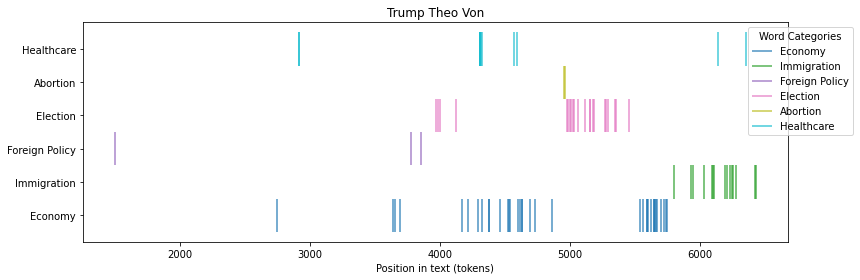

Economy Words Count: 36
Immigration Words Count: 15
Foreign Policy Words Count: 3
Election Words Count: 22
Abortion Words Count: 2
Healthcare Words Count: 13
Total Length: 6549 



In [19]:
for item in hits_dicts:
    dispersion_plot_overlays(item['hits_dict'], title = item['title'])
    print('Total Length:', item['length'], '\n')

## Observations

- The dispersion plots vary significantly for each podcast and interview enough that it can be difficult to draw conclusions between them.
- The hypothesis that Trump's podcasts will be more sparse and free flowing is true to an extent. We see that a lot of jumping from topic to topic, especially in the Elon Musk and Joe Rogan podcasts. Some podcasts such as Theo Von and Bussin with the Boys seemed to have less issue focus throughout which could indicate more personal anecdotes. 
- The news Trump's interview appearances tend to have more structure with clearer divisions of where topics start and where they end (e.g. Faulkner, Ingram), with the excetption of the NABJ interview which was panel-style opening up opportunities for different interviewers to question Trump in different ways. Meanwhile the Bloomberg interview reveals heavy issue focus on the economy in the beggining and middle, and then more sparsity later in the conversation.
- Harris' podcasts also tend to reveal significant interweaving of different topics. While certain sections, clearly hyper-focus on certain issues (i.e. the economy in 4000-5000 in All The Smoke), these patterns are difficult to spot. We also see different focus in different podcasts such as a much more prevalent discussion abortion and healthcare in Call her Daddy.
-  Harris' interviews again seem to be more structured proceeding logically from topic to topic rather than jumping around as much as in the podcasts. 